In [5]:
import pandas as pd
from src.archive.feature_manager import FeatureManager
from monte_sim import MonteCarloSimulator
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# load the data
bond_yields_train_shifted_1 = pd.read_parquet('data/bond_yields_train_shifted_1.parquet')
bond_yields_train_shifted_7 = pd.read_parquet('data/bond_yields_train_shifted_7.parquet')
bond_yields_train_shifted_30 = pd.read_parquet('data/bond_yields_train_shifted_30.parquet')
bond_yields_train_shifted_60 = pd.read_parquet('data/bond_yields_train_shifted_60.parquet')

In [8]:
dependent_varaibles = [
    'DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30'
]

bond_yields_train_shifted_1[dependent_varaibles] = bond_yields_train_shifted_1[dependent_varaibles] * 100
bond_yields_train_shifted_7[dependent_varaibles] = bond_yields_train_shifted_7[dependent_varaibles] * 100
bond_yields_train_shifted_30[dependent_varaibles] = bond_yields_train_shifted_30[dependent_varaibles] * 100
bond_yields_train_shifted_60[dependent_varaibles] = bond_yields_train_shifted_60[dependent_varaibles] * 100

In [12]:
bond_yields_train_shifted_60[dependent_varaibles]

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
period,,,,,,,,,,,
2011-01-01,0.07,0.12,0.19,0.29,0.61,1.02,2.01,2.71,3.30,4.13,4.34
2011-01-02,0.07,0.12,0.19,0.29,0.61,1.02,2.01,2.71,3.30,4.13,4.34
2011-01-03,0.11,0.15,0.19,0.29,0.61,1.03,2.02,2.74,3.36,4.18,4.39
2011-01-04,0.12,0.14,0.19,0.28,0.63,1.04,2.01,2.72,3.36,4.21,4.44
2011-01-05,0.13,0.14,0.19,0.31,0.71,1.16,2.14,2.86,3.50,4.34,4.55
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,4.44,4.31,4.29,4.20,4.31,4.36,4.45,4.53,4.62,4.89,4.82
2024-12-28,4.44,4.31,4.29,4.20,4.31,4.36,4.45,4.53,4.62,4.89,4.82
2024-12-29,4.44,4.31,4.29,4.20,4.31,4.36,4.45,4.53,4.62,4.89,4.82


In [16]:
future_vals = [
    f"{x}_future_val" for x in dependent_varaibles
]
bond_yields_train_shifted_1[future_vals]

,DGS1MO_future_val,DGS3MO_future_val,DGS6MO_future_val,DGS1_future_val,DGS2_future_val,DGS3_future_val,DGS5_future_val,DGS7_future_val,DGS10_future_val,DGS20_future_val,DGS30_future_val
period,,,,,,,,,,,
2011-01-01,0.07,0.12,0.19,0.29,0.61,1.02,2.01,2.71,3.30,4.13,4.34
2011-01-02,0.11,0.15,0.19,0.29,0.61,1.03,2.02,2.74,3.36,4.18,4.39
2011-01-03,0.12,0.14,0.19,0.28,0.63,1.04,2.01,2.72,3.36,4.21,4.44
2011-01-04,0.13,0.14,0.19,0.31,0.71,1.16,2.14,2.86,3.50,4.34,4.55
2011-01-05,0.13,0.15,0.18,0.30,0.68,1.11,2.09,2.80,3.44,4.31,4.53
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,4.44,4.31,4.29,4.20,4.31,4.36,4.45,4.53,4.62,4.89,4.82
2024-12-28,4.44,4.31,4.29,4.20,4.31,4.36,4.45,4.53,4.62,4.89,4.82
2024-12-29,4.43,4.37,4.25,4.17,4.24,4.29,4.37,4.46,4.55,4.84,4.77


In [17]:
dependent_varaibles = [
    'DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30'
]
shift_values = [-1, -7, -30, -60]
data_frames = [
    bond_yields_train_shifted_1,
    bond_yields_train_shifted_7,
    bond_yields_train_shifted_30,
    bond_yields_train_shifted_60
]
calculate_gain_loss_data = []
# get the future gain or loss value for each dependent variable
for shift, df in zip(shift_values, data_frames):
    for dep_var in dependent_varaibles:
        gain_loss_col = f'{dep_var}_gain_loss_{-shift}d'
        df[gain_loss_col] = df[dep_var].shift(shift) - df[dep_var]
    calculate_gain_loss_data.append(df)

# assign back to original dataframes
bond_yields_train_shifted_1 = calculate_gain_loss_data[0]
bond_yields_train_shifted_7 = calculate_gain_loss_data[1]
bond_yields_train_shifted_30 = calculate_gain_loss_data[2]
bond_yields_train_shifted_60 = calculate_gain_loss_data[3]
# persist the dataframes
bond_yields_train_shifted_1.to_parquet('data/bond_yields_train_shifted_1_sim.parquet')
bond_yields_train_shifted_7.to_parquet('data/bond_yields_train_shifted_7_sim.parquet')
bond_yields_train_shifted_30.to_parquet('data/bond_yields_train_shifted_30_sim.parquet')
bond_yields_train_shifted_60.to_parquet('data/bond_yields_train_shifted_60_sim.parquet')

In [19]:

# check the values
bond_yields_train_shifted_7[['DGS30_future_val', 'DGS30', 'DGS30_gain_loss_7d']].head(10)



,DGS30_future_val,DGS30,DGS30_gain_loss_7d
period,,,
2011-01-01,4.48,4.34,0.14
2011-01-02,4.48,4.34,0.14
2011-01-03,4.47,4.39,0.08
2011-01-04,4.49,4.44,0.05
2011-01-05,4.52,4.55,-0.03
2011-01-06,4.50,4.53,-0.03
2011-01-07,4.53,4.48,0.05
2011-01-08,4.53,4.48,0.05
2011-01-09,4.53,4.48,0.05


In [7]:
bond_yields_train_shifted_30[['DGS30', 'DGS30_gain_loss_30d']].head()

,DGS30,DGS30_gain_loss_30d
period,,
2011-01-01,0.0434,0.0024
2011-01-02,0.0434,0.0028
2011-01-03,0.0439,0.0025
2011-01-04,0.0444,0.0023
2011-01-05,0.0455,0.0018


In [5]:
# calculate the daily change in our independent variables
feature_manager = FeatureManager(features_config_path='data/features_selected3.yaml')

independent_variables_1d = feature_manager.get_features_for_time_pred('one-day-ahead')
independent_variables_7d = feature_manager.get_features_for_time_pred('seven-day-ahead')
independent_variables_30d = feature_manager.get_features_for_time_pred('thirty-day-ahead')
independent_variables_60d = feature_manager.get_features_for_time_pred('sixty-day-ahead')

transform_cols = [f"{col}_change_1d" for col in independent_variables_1d]
bond_yields_train_shifted_1[transform_cols] = bond_yields_train_shifted_1[independent_variables_1d].diff(periods=1)

transform_cols = [f"{col}_change_7d" for col in independent_variables_7d]
bond_yields_train_shifted_7[transform_cols] = bond_yields_train_shifted_7[independent_variables_7d].diff(periods=7)

transform_cols = [f"{col}_change_30d" for col in independent_variables_7d]
bond_yields_train_shifted_7[transform_cols] = bond_yields_train_shifted_7[independent_variables_7d].diff(periods=30)

transform_cols = [f"{col}_change_7d" for col in independent_variables_30d]
bond_yields_train_shifted_30[transform_cols] = bond_yields_train_shifted_30[independent_variables_30d].diff(periods=7)

transform_cols = [f"{col}_change_30d" for col in independent_variables_30d]
bond_yields_train_shifted_30[transform_cols] = bond_yields_train_shifted_30[independent_variables_30d].diff(periods=30)


transform_cols = [f"{col}_change_30d" for col in independent_variables_60d]
bond_yields_train_shifted_60[transform_cols] = bond_yields_train_shifted_60[independent_variables_60d].diff(periods=30)

transform_cols = [f"{col}_change_60d" for col in independent_variables_60d]
bond_yields_train_shifted_60[transform_cols] = bond_yields_train_shifted_60[independent_variables_60d].diff(periods=60)



INFO:feature_manager:Loaded features for 5 future time predictions
INFO:feature_manager:Available time predictions: ['one-day-ahead', 'dependent_variables', 'seven-day-ahead', 'sixty-day-ahead', 'thirty-day-ahead']
INFO:feature_manager:Retrieved 17 features for one-day-ahead
INFO:feature_manager:Retrieved 18 features for seven-day-ahead
INFO:feature_manager:Retrieved 18 features for thirty-day-ahead
INFO:feature_manager:Retrieved 16 features for sixty-day-ahead


In [12]:
bond_yields_train_shifted_1[["DGS3", "DGS3_change_1d"]].head()

,DGS3,DGS3_change_1d
period,,
2011-01-01,0.0102,NaN
2011-01-02,0.0102,0.0000
2011-01-03,0.0103,0.0001
2011-01-04,0.0104,0.0001
2011-01-05,0.0116,0.0012


In [7]:
bond_yields_train_shifted_1[['DGS30', 'DGS30_gain_loss_1d']] = bond_yields_train_shifted_1[['DGS30', 'DGS30_gain_loss_1d']] * 100

bond_yields_train_shifted_1[['DGS30', 'DGS30_gain_loss_1d']]

,DGS30,DGS30_gain_loss_1d
period,,
2011-01-01,4.34,0.00
2011-01-02,4.34,0.05
2011-01-03,4.39,0.05
2011-01-04,4.44,0.11
2011-01-05,4.55,-0.02
...,...,...
2024-12-27,4.82,0.00
2024-12-28,4.82,0.00
2024-12-29,4.82,-0.05


In [17]:
start_indx = 300
end_indx = 600
y_train = bond_yields_train_shifted_1.iloc[start_indx: end_indx]['DGS30_gain_loss_1d']
future_yield = bond_yields_train_shifted_1.iloc[end_indx + 1]['DGS30']
current_yield = bond_yields_train_shifted_1.iloc[end_indx]['DGS30']

monte_carlo_simulator = MonteCarloSimulator()
simulated_yields = monte_carlo_simulator.fit_and_simulate(y=y_train.to_numpy(), current_yield=current_yield)
print(f"current_yield: {current_yield}")
simulated_yields

current_yield: 2.79


array([[2.78782682],
       [2.78735711],
       [2.78244334],
       [2.78620568],
       [2.78452849],
       [2.78986161],
       [2.79125477],
       [2.78719879],
       [2.7877121 ],
       [2.78805177],
       [2.78746657],
       [2.78754268],
       [2.78830251],
       [2.78995961],
       [2.7876592 ],
       [2.7865797 ],
       [2.78826808],
       [2.78251457],
       [2.78701554],
       [2.78730856],
       [2.78251132],
       [2.78400779],
       [2.78698024],
       [2.78679312],
       [2.78964125],
       [2.78189246],
       [2.78706366],
       [2.78474495],
       [2.7901041 ],
       [2.78676582],
       [2.78391333],
       [2.78276933],
       [2.7914268 ],
       [2.78742432],
       [2.78671414],
       [2.78447908],
       [2.78725478],
       [2.78636051],
       [2.78921051],
       [2.78616684],
       [2.79105649],
       [2.78726206],
       [2.79044614],
       [2.78856119],
       [2.78705379],
       [2.78421007],
       [2.78912372],
       [2.786

<Axes: ylabel='Density'>

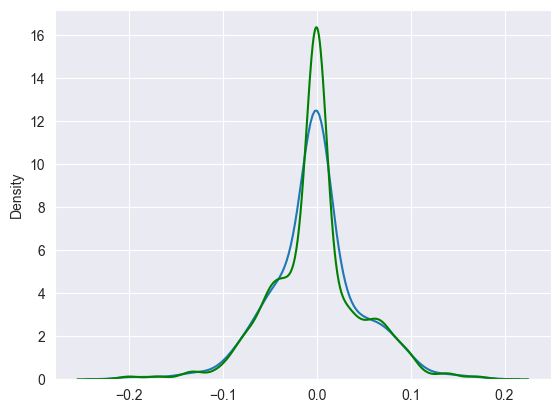

In [18]:
sns.kdeplot(y_train.to_numpy())
sns.lineplot(x=monte_carlo_simulator.xde, y=monte_carlo_simulator.ykde, color='g')

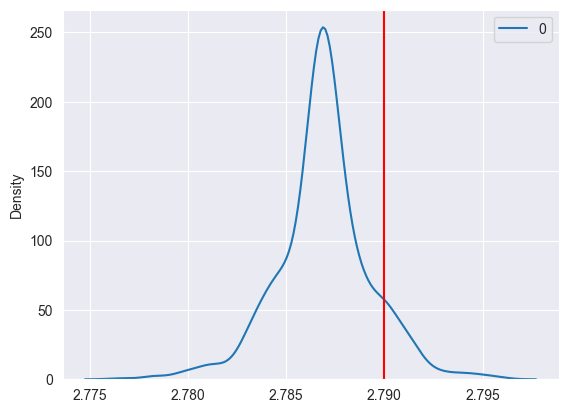

In [19]:
sns.kdeplot(simulated_yields)
plt.axvline(future_yield, color='r')